In [1]:
!pip install matplotlib

import numpy as np

  Using cached matplotlib-3.10.6-cp313-cp313-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.3.3-cp313-cp313-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.59.2-cp313-cp313-win_amd64.whl.metadata (111 kB)
  Using cached kiwisolver-1.4.9-cp313-cp313-win_amd64.whl.metadata (6.4 kB)
  Using cached pillow-11.3.0-cp313-cp313-win_amd64.whl.metadata (9.2 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.1 MB 773.3 kB/s eta 0:00:10
  

In [2]:
X_train = np.array([
    [150, 12],
    [160, 14],
    [170, 16],
    [180, 18],
    [165, 20],
    [155, 15],
    [175, 19],
    [185, 21]
], dtype=float)

y_train = np.array([[0],[0],[0],[1],[1],[0],[1],[1]])

In [3]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def dsigmoid(a):
    return a * (1 - a)

In [4]:
X_train = X_train / np.max(X_train, axis=0)
print("X tarin after normalization:\n", X_train)

X tarin after normalization:
 [[0.81081081 0.57142857]
 [0.86486486 0.66666667]
 [0.91891892 0.76190476]
 [0.97297297 0.85714286]
 [0.89189189 0.95238095]
 [0.83783784 0.71428571]
 [0.94594595 0.9047619 ]
 [1.         1.        ]]


In [5]:
np.random.seed(42)
W1 = np.random.randn(2, 2)   # input → hidden1
b1 = np.zeros((1, 2))

W2 = np.random.randn(2, 2)   # hidden1 → hidden2
b2 = np.zeros((1, 2))

W3 = np.random.randn(2, 1)   # hidden2 → output
b3 = np.zeros((1, 1))

In [6]:
print("W1:\n", W1,"  | b1:", b1)
print("W2:\n", W2, " | b2:", b2)
print("W3:\n", W3, " | b3:", b3)

W1:
 [[ 0.49671415 -0.1382643 ]
 [ 0.64768854  1.52302986]]   | b1: [[0. 0.]]
W2:
 [[-0.23415337 -0.23413696]
 [ 1.57921282  0.76743473]]  | b2: [[0. 0.]]
W3:
 [[-0.46947439]
 [ 0.54256004]]  | b3: [[0.]]


In [7]:
lr = 0.5
epochs = 5000
m = len(X_train)

In [8]:
for epoch in range(epochs):
    # forward
    z1 = X_train @ W1 + b1
    a1 = sigmoid(z1)

    z2 = a1 @ W2 + b2
    a2 = sigmoid(z2)

    z3 = a2 @ W3 + b3
    a_out = sigmoid(z3)

    # loss (MSE)
    loss = np.mean((y_train - a_out) ** 2)

    # backward
    dZ3 = (a_out - y_train) * dsigmoid(a_out)
    dW3 = (a2.T @ dZ3) / m
    db3 = np.mean(dZ3, axis=0, keepdims=True)

    dA2 = dZ3 @ W3.T
    dZ2 = dA2 * dsigmoid(a2)
    dW2 = (a1.T @ dZ2) / m
    db2 = np.mean(dZ2, axis=0, keepdims=True)

    dA1 = dZ2 @ W2.T
    dZ1 = dA1 * dsigmoid(a1)
    dW1 = (X_train.T @ dZ1) / m
    db1 = np.mean(dZ1, axis=0, keepdims=True)

    # update
    W3 -= lr * dW3; b3 -= lr * db3
    W2 -= lr * dW2; b2 -= lr * db2
    W1 -= lr * dW1; b1 -= lr * db1

    if epoch % 500 == 0:
        print(f"Epoch {epoch}, Loss={loss:.6f}")

Epoch 0, Loss=0.250459
Epoch 500, Loss=0.249704
Epoch 1000, Loss=0.248945
Epoch 1500, Loss=0.247877
Epoch 2000, Loss=0.246002
Epoch 2500, Loss=0.241970
Epoch 3000, Loss=0.231132
Epoch 3500, Loss=0.194836
Epoch 4000, Loss=0.108498
Epoch 4500, Loss=0.050212


In [9]:
# prediction
preds = (a_out > 0.5).astype(int)
print("\nFinal Predictions:", preds.ravel())
print("True Labels:      ", y_train.ravel())


Final Predictions: [0 0 0 1 1 0 1 1]
True Labels:       [0 0 0 1 1 0 1 1]


In [10]:
def predict(X_new):
    # normalize same as training
    X_new = X_new / np.max(X_train, axis=0)

    # forward pass only
    z1 = X_new @ W1 + b1
    a1 = sigmoid(z1)

    z2 = a1 @ W2 + b2
    a2 = sigmoid(z2)

    z3 = a2 @ W3 + b3
    a_out = sigmoid(z3)

    return (a_out > 0.5).astype(int)

In [11]:
X_test = np.array([
    [172, 17],
    [160, 22],  
    [150, 13], 
    [185, 20]   
])

predictions = predict(X_test)

print("\nTest Inputs (Height, Age):")
print(X_test)
print("Predicted Fit/Not Fit:", predictions.ravel())


Test Inputs (Height, Age):
[[172  17]
 [160  22]
 [150  13]
 [185  20]]
Predicted Fit/Not Fit: [0 1 0 1]


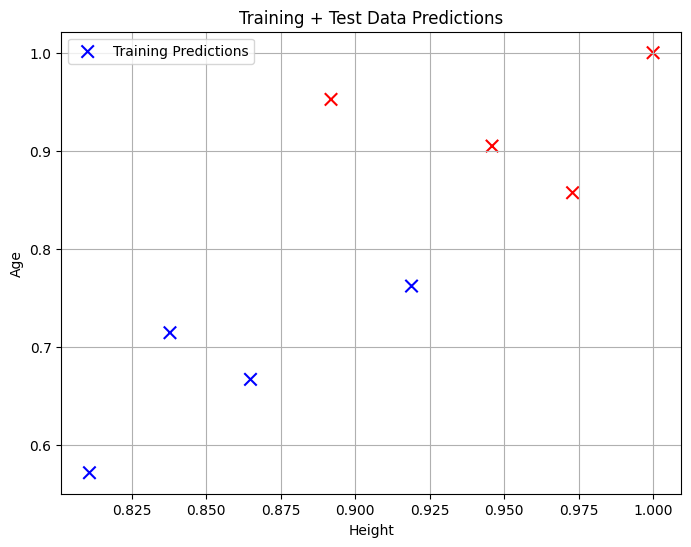

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))


plt.scatter(X_train[:,0]*np.max(X_train, axis=0)[0], X_train[:,1]*np.max(X_train, axis=0)[1], 
            c=preds.ravel(), marker="x", cmap="bwr", s=80, label="Training Predictions")

# --- Test Data ---


# labels on test points
for i, txt in enumerate(predictions.ravel()):
    plt.annotate(txt, (X_test[i,0]+1, X_test[i,1]+0.5), fontsize=9, color="black")

plt.xlabel("Height")
plt.ylabel("Age")
plt.title("Training + Test Data Predictions")
plt.legend()
plt.grid(True)
plt.show()
